# 1. 네이버 뉴스 Crawling with Naver Open API
- 네이버 개발자 가입 : 서비스 API > 검색 > [오픈 API 이용 신청]
- 검색 API 사용 신청 : Products > 검색 > [오픈 API 이용 신청]

https://developers.naver.com/main/

## 다음 영화 리뷰 리워드 시각화
1. 텍스트 코딩
2. 토큰화
3. 빈도수 추출
4. 수평 막대 그래프
5. 워드클라우드

In [1]:
# 네이버 검색 API 예제 -  블로그 검색 예제를 뉴스 검색 예제로 수정하여 실행
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "id"
client_secret = "key"
encText = urllib.parse.quote("인공지능")
url = "https://openapi.naver.com/v1/search/news?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 19 Mar 2025 18:30:27 +0900",
	"total":2816469,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"저커버그 &quot;라마 모델 10억 다운로드 달성&quot;",
			"originallink":"https:\/\/www.aitimes.com\/news\/articleView.html?idxno=168924",
			"link":"https:\/\/www.aitimes.com\/news\/articleView.html?idxno=168924",
			"description":"메타의 오픈 소스 <b>인공지능<\/b>(AI) 모델 '라마(Llama)'가 다운로드 10억회를 넘겼다. 마크 저커버그 메타 CEO는 18일(현지시간) 스레드 채널을 통해 &quot;라마의 다운로드 수가 10억회를 돌파했다는 사실을 알게 됐다&quot;라고 밝혔다.... ",
			"pubDate":"Wed, 19 Mar 2025 18:28:00 +0900"
		},
		{
			"title":"'5분 충전에 400km' BYD 쇼크... 中 전기차 기술, 세계를 뒤흔든다",
			"originallink":"http:\/\/www.fnnews.com\/news\/202503191826450613",
			"link":"https:\/\/n.news.naver.com\/mnews\/article\/014\/0005323429?sid=104",
			"description":"샤오펑도 <b>인공지능<\/b>(AI)을 활용한 커넥티드카 생산에 박차를 가하는 가운데 1·4분기에 전년 대비 300% 증가한 9만3000대의 차량 인도를 준비 중이다. 기술력과 가성비의 약진 속에서 중국차들이 시선을 해외로 돌린... ",
			"pubDate":"Wed, 19 Mar 2025 18:27:00 +0900"
		},
		{
			"title":"&quot;내년 나올 루빈, 호

In [2]:
review_list = list(data_df.review)
review_list[:10]

NameError: name 'data_df' is not defined

# 2. urllib : URL 작업용 패키지 (built-in)
* import urllib
* HTTP, FTP, SMTP 등과 같은 프로토콜을 사용하여 URL을 열고 읽고 쓰는 기능 제공

* https://ctkim.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-urllib-%EB%AA%A8%EB%93%88
   - urllib.request : 다양한 방식으로 URL을 열고 데이터를 가져오는 기능 제공
   - urllib.response : urllib가 사용하는 응답 클래스
   - urllib.parse : URL 파싱, 인코딩, 디코딩
   - urllib.robotparser : robots.txt 파일의 parsing
  

## 2-1. urllib으로 Open API 사용하기
  - 특수문자 및 비ASCII코드를 url에 사용할 수 있도록 변경 : *string* = **urllib.parse.quote**(*string*)
  - 요청 메시지 생성
    - Request 객체 생성 : *request_object* = **urllib.request.Request**(*url*)
    - Request 객체 Header에 API 사용을 위한 정보 추가 : *request_object*.add_header(*key*, *val*)
  - API 요청 및 결과 받기
    - Request 객체로 url 열고 HTTPResponse 객체 받기 : *Response* = **urllib.request.urlopen**(*Request*)
    - urlopen 결과 상태 정보 얻기 : *Response*.**getcode()** (**status**)
    - Response 객체에서 요청 결과 얻기 : *Response*.**read()**
    - 결과에 한글이 표함된 경우 UTF-8로 디코팅 : *string*.**decode**('utf-8')

## Naver 검색 API 동작 방식
   - start부터 display 수만큼 검색 결과를 json으로 가져옴
   - 검색 결과는 json의 'items'에 들어 있음
   - 검색 결과 수는 'display'에 들어 있음

In [8]:
# 네이버 검색 API 예제 기반으로 네이버 검색 API 동작 방식 확인 (검색 결과 모두 받기)
# rescode가 200인 동안 start를 증가시켜서 계속 검색 (테스트를 위해 start는 25이하로 제한)
# 네이버 검색 API 예제 -  블로그 검색 예제를 뉴스 검색 예제로 수정하여 실행
# 네이버 검색 API 예제 - 블로그 검색

client_id = "id"
client_secret = "key"
encText = urllib.parse.quote("인공지능")
url = "https://openapi.naver.com/v1/search/news?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
rescode = 200
start = 1
display = 10

while rescode == 200 and start < 30:

    new_url = url + f'&start={start}&display={display}'

    request = urllib.request.Request(new_url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    
    response = urllib.request.urlopen(request)
    
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)
        
    start += display

{
	"lastBuildDate":"Wed, 19 Mar 2025 16:55:17 +0900",
	"total":2816064,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"국립생태원, 이제는 <b>인공지능<\/b>으로 야생동물 분석한다",
			"originallink":"http:\/\/www.chungnamilbo.co.kr\/news\/articleView.html?idxno=819146",
			"link":"http:\/\/www.chungnamilbo.co.kr\/news\/articleView.html?idxno=819146",
			"description":"국립생태원은 <b>인공지능<\/b> 전문기업 스피어에이엑스와 협업해 '야생동물 자동 종동정 에코에이아이(Eco.AI) 시스템'(이하 Eco.AI)을 개발했다고 밝혔다. 충남 서천군에 위치한 국립생태원은 <b>인공지능<\/b> 전문기업... ",
			"pubDate":"Wed, 19 Mar 2025 16:54:00 +0900"
		},
		{
			"title":"신재생에너지 주택 지원 사업 추진…광주시, 설치비 지원 확대",
			"originallink":"https:\/\/www.topstarnews.net\/news\/articleView.html?idxno=15619359",
			"link":"https:\/\/www.topstarnews.net\/news\/articleView.html?idxno=15619359",
			"description":"최태조 <b>인공지능<\/b>산업실장은 &quot;신재생에너지 주택 지원 사업은 시민들이 친환경 에너지에 관심을 갖고 에너지 자립 도시에 기여할 수 있는 기회&quot;라며 &quot;환경친화적인 신재생에너지 보급을 지속적으로 확대해 나가겠다... ",
			"pubDate":"Wed, 19 Mar 2025 16:54:00 +0900"
		},
		{
			"title":"'이정재 

# 3. json : JSON 데이터 파싱,생성 (built-in)
* import json
* JSON 문자열을 파이썬 객체로 변환 : *pyObject* = **json.loads**(*jsonString*)
* 파이썬 객체를 JSON 문자열로 변환 : *jsonString* = **json.dumps**(*pyObject*)
   - ensure_ascii=True : 한글일때는 False로 변경하기
   - indent=None : 가독성을 높이기 위해 숫자 지정하기
* JSON 파일을 파이썬 객체로 로딩 : *pyObject* = **json.load**()
* 파이썬 객체를 JSON 파일에 저장 : **json.dump**(*pyObject*, *fileObject*)

https://docs.python.org/3/library/json.html

# [ 프로그램 Workflow ]
1. 네이버 뉴스 API로 Crawling : **searchNaverNews()** -> 파이썬 json 데이터
   1. url 구성하기
   1. url 접속과 검색 요청하기
   1. url 요청결과를 응답 json으로 받기 (json.loads)
1. 응답데이터를 리스트에 저장 : **setNewsSearchResult** -> List
1. 응답데이터가 없을 때까지 반복
   1. 파이썬 예외처리 : try + except + else + finally
1. 리스트를 CSV 파일로 저장 : **saveSearchResult** (pd.to_csv)

In [20]:
# 검색 API 호출, 응답을 JSON 데이터로 return하는 함수 작성
# API 호출 결과에 문제가 있을 경우 exception으로 처리
# exception 발생 시 exception과 호출 url 확인
import urllib.request
import json

def searchNaverNews(keyword, start, display):
    # 네이버 검색 API 예제 기반으로 네이버 검색 API 동작 방식 확인 (검색 결과 모두 받기)
# rescode가 200인 동안 start를 증가시켜서 계속 검색 (테스트를 위해 start는 25이하로 제한)
# 네이버 검색 API 예제 -  블로그 검색 예제를 뉴스 검색 예제로 수정하여 실행
# 네이버 검색 API 예제 - 블로그 검색

    client_id = "id"
    client_secret = "key"
    
    encText = urllib.parse.quote(keyword)
    url = "https://openapi.naver.com/v1/search/news?query=" + encText # JSON 결과
    
    new_url = url + f'&start={start}&display={display}'
    request = urllib.request.Request(new_url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)

    resultJSON = None
    try:
        response = urllib.request.urlopen(request)
        
        rescode = response.getcode()
        if(rescode == 200):
            response_body = response.read()
            resultJSON = json.loads(response_body.decode('utf-8'))
        else:
            print("Error Code:" + rescode)
    except Exception as e:
        print(e)
        print(f'Error : {new_url}')

    return resultJSON

In [4]:
#응답데이터를 리스트에 저장 (검색 결과는 json의 'items'에 들어 있음)
def setNewsSearchResult(resultAll, resultJSON):
    for result in resultJSON['items']:
        resultAll.append(result)

In [5]:
# JSON의 list를 dataframe으로 변환하여 csv 파일로 저장
def saveSearchResult_CSV(json_list, filename):
    import pandas as pd
    data_df = pd.DataFrame(json_list)
    data_df.to_csv(filename)
    print(f'{filename} SAVED')

In [6]:
def visuallize_wordcloud(counter):
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    font_path = "c:/Windows/fonts/malgun.ttf"

    wordcloud = WordCloud(font_path, width=600, height=600, max_words=20, background_color='ivory')

    wordcloud = wordcloud.generate_from_frequencies(counter)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    output_filename = './result/' + f'{keyword}_wordcloud.png'
    wordcloud.to_file(output_filename)

In [7]:
def load_corpus_from_csv(corpus_file, col_name):
    import pandas as pd
    data_df = pd.read_csv(corpus_file)
    result_list = list(data_df[col_name])
    return result_list

In [8]:
def analyze_word_freq(corpus_list, tokenizer, tags, stopwords):
    token_list = tokenize_korean_corpus(corpus_list, tokenizer, tags, stopwords)
    
    counter = Counter(token_list)
    return counter

In [9]:
def tokenize_korean_corpus(corpus_list, tokenizer, tags, stopwords):
    text_pos_list = []
    for text in corpus_list:
        text_pos = tokenizer(text)
        text_pos_list.extend(text_pos)
    token_list = [token for token, tag in text_pos_list if tag in tags and token not in stopwords]
    return token_list


검색어 :  금요일날씨


금요일날씨 [11] : Search Request Success
금요일날씨 [21] : Search Request Success
금요일날씨 [31] : Search Request Success
금요일날씨 [41] : Search Request Success
금요일날씨 [51] : Search Request Success
금요일날씨 [61] : Search Request Success
금요일날씨 [71] : Search Request Success
금요일날씨 [81] : Search Request Success
금요일날씨 [91] : Search Request Success
금요일날씨 [101] : Search Request Success
금요일날씨 [111] : Search Request Success
금요일날씨 [121] : Search Request Success
금요일날씨 [131] : Search Request Success
금요일날씨 [141] : Search Request Success
금요일날씨 [151] : Search Request Success
금요일날씨 [161] : Search Request Success
금요일날씨 [171] : Search Request Success
금요일날씨 [181] : Search Request Success
금요일날씨 [191] : Search Request Success
금요일날씨 [201] : Search Request Success
금요일날씨 [211] : Search Request Success
금요일날씨 [221] : Search Request Success
금요일날씨 [231] : Search Request Success
금요일날씨 [241] : Search Request Success
금요일날씨 [251] : Search Request Success
금요일날씨 [261] : Search Request Success
금요일날씨 [271] : Search Request Success
금요일날씨 [281

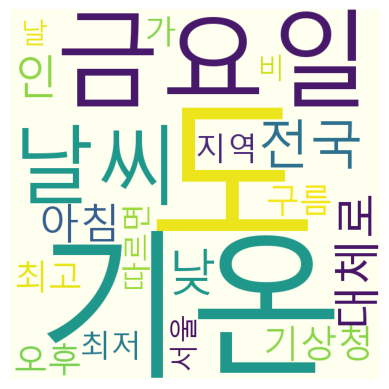

In [21]:
# 검색어 입력
from collections import Counter
keyword = input("검색어 : ").strip()
#keyword = '인공지능'

# API 호출 결과 전송된 JSON이 없거나, 전송된 JSON에 검색 결과가 없을 때까지
# 검색 결과를 JSON의 list로 저장 후 검색 API 추가 호출


# 검색 결과를 저장할 list 초기화
resultAll = []

# 첫 검색 API 호출
start = 1
display = 10

resultJSON = searchNaverNews(keyword, start, display)

while (resultJSON != None) and (resultJSON['display'] > 0):
    # 응답데이터 정리하여 리스트 저장
    setNewsSearchResult(resultAll, resultJSON)
 
    # 다음 검색 API 호출을 위한 파라미터 조정
    start += display

    resultJSON = searchNaverNews(keyword, start, display)
    # API 호출 성공 여부 출력
    if resultJSON != None:
        print(f'{keyword} [{start}] : Search Request Success')
    else :
        print(f'{keyword} [{start}] :Error ~~')

# 리스트를 csv 파일로 저장
filename = f'./data/{keyword}_naver_news.csv'
saveSearchResult_CSV(resultAll, filename)

from konlpy.tag import Okt

corpus_list = load_corpus_from_csv(filename, "description")

my_tokenizer = Okt().pos
my_tags = ['Noun', 'Adjective', 'Verb']
my_stopwords = ['하며', '입', '하고', '로써', '하게', '하여', '한다']
counter = analyze_word_freq(corpus_list, my_tokenizer, my_tags, my_stopwords)

visuallize_wordcloud(counter)

In [25]:
# 저장한 파일을 dataframe으로 loading 해보기
import pandas as pd
data_df = pd.read_csv('./data/인공지능_naver_news.csv', index_col=0)
data_df.head()

,title,originallink,link,description,pubDate
0,"동작구 김영삼도서관, 서울大 석학이 알려주는 자녀교육",https://www.siminilbo.co.kr/news/newsview.php?...,https://www.siminilbo.co.kr/news/newsview.php?...,"먼저 4월4일 오후 2시, 수학교육과 이경화 교수가 첫 강사로 나서 ‘<b>인공지능...","Wed, 19 Mar 2025 17:33:00 +0900"
1,"민주, 안철수 &quot;李 목긁힌 뒤 누워&quot;→나경원 &quot;자작극 의...",https://www.slist.kr/news/articleView.html?idx...,https://www.slist.kr/news/articleView.html?idx...,국민의힘 안철수 의원은 더불어민주당 이재명 대표가 오는 22일 유발 하라리 작가와 ...,"Wed, 19 Mar 2025 17:32:00 +0900"
2,"크래프톤, AI 기술 집약체 ‘인조이’ 출격…“다양한 인생 간접체험”",https://www.ceoscoredaily.com/page/view/202503...,https://www.ceoscoredaily.com/page/view/202503...,크래프톤이 ‘<b>인공지능</b>(AI)’ 분야 신기술을 다수 접목한 차세대 인생 ...,"Wed, 19 Mar 2025 17:32:00 +0900"
3,"용인특례시, ‘생성형 AI를 활용한 숏폼 콘텐츠 제작’수강생 모집",https://www.siminilbo.co.kr/news/newsview.php?...,https://www.siminilbo.co.kr/news/newsview.php?...,시 관계자는 “최근 관심도가 높은 <b>인공지능</b>(AI)을 활용해 콘텐츠 제작...,"Wed, 19 Mar 2025 17:32:00 +0900"
4,"신한카드, AI 스타트업 육성 공모전 시상식 개최",http://www.womentimes.co.kr/news/articleView.h...,http://www.womentimes.co.kr/news/articleView.h...,이번 공모전은 신한카드가 서울창조경제혁신센터와 함께 유망 <b>인공지능</b>(AI...,"Wed, 19 Mar 2025 17:32:00 +0900"
